In [1]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [2]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
RdoOrdinario=c(968772,-59538,899658,-1607991,47962,448286,128220,224724,2183194,1451961,2303783,-8837850,2308163,1178093,877074,-945512,322738,4220580,1226564,-672814,3694450,642229,1100433,-3761427,-8247328,524732,5039520,3576723,1554726,4186345,-5337533,-1498576,2349353,2789216,1039623,-4566671,-5817913,2738370,7057589,6501760,6784486,1190704,2493362,13314451,13999099,1794991,4397498,-1902371,23696883,7922174,8298826,-3717444,-10809350,585855,5376851,17806612,19900190,-1107242,2965629,-15576313,37439525,12511929,12219757,-1856509,-13803050,1030010) 

In [4]:
RdoOrdinario

[1]    968772    -59538    899658  -1607991     47962    448286    128220
 [8]    224724   2183194   1451961   2303783  -8837850   2308163   1178093
[15]    877074   -945512    322738   4220580   1226564   -672814   3694450
[22]    642229   1100433  -3761427  -8247328    524732   5039520   3576723
[29]   1554726   4186345  -5337533  -1498576   2349353   2789216   1039623
[36]  -4566671  -5817913   2738370   7057589   6501760   6784486   1190704
[43]   2493362  13314451  13999099   1794991   4397498  -1902371  23696883
[50]   7922174   8298826  -3717444 -10809350    585855   5376851  17806612
[57]  19900190  -1107242   2965629 -15576313  37439525  12511929  12219757
[64]  -1856509 -13803050   1030010

In [14]:
RdoOrdinario.ts = ts(RdoOrdinario, start = c(2015,7), frequency = 12)

RdoOrdinario.ts = RdoOrdinario.ts/1000000



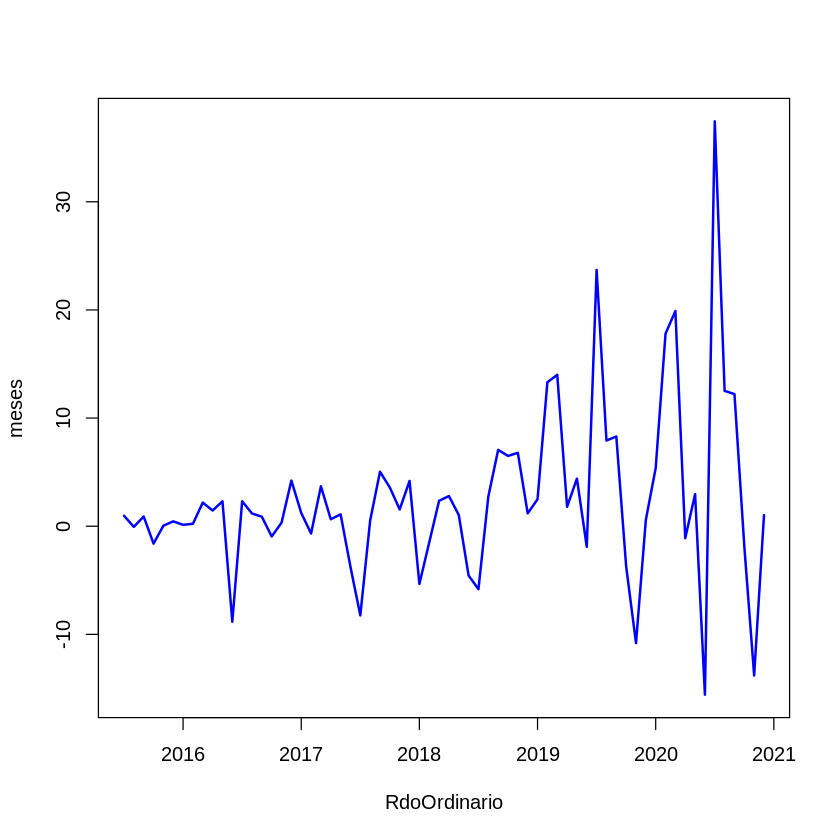

In [15]:

plot(RdoOrdinario.ts, ylab="meses", xlab="RdoOrdinario",type="l", lwd = 2,pch=2,cex = 2,col="blue")

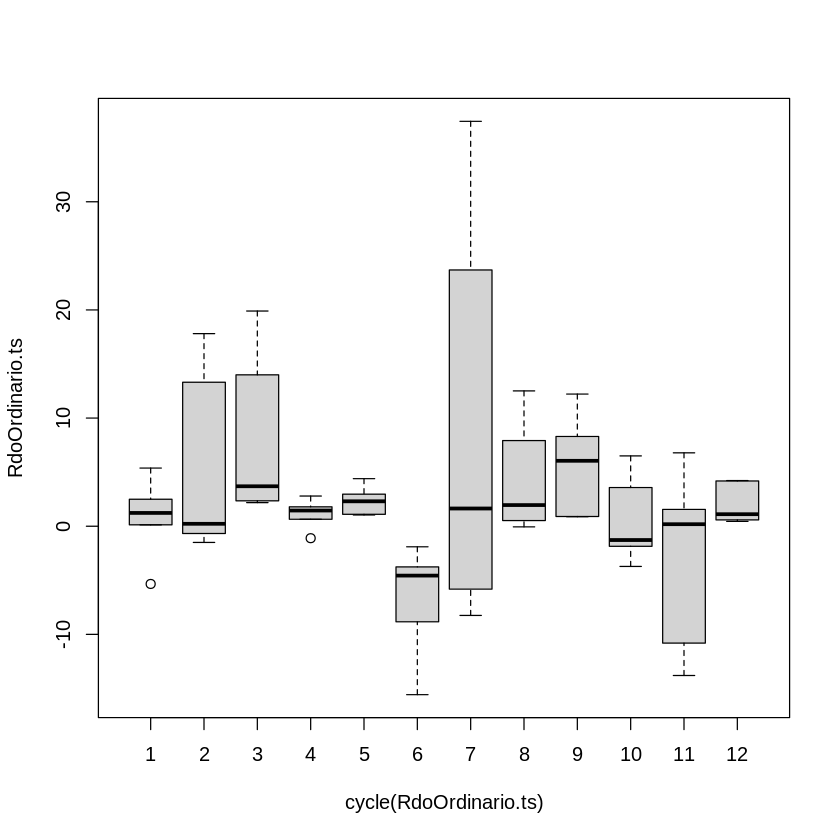

In [16]:
boxplot(RdoOrdinario.ts ~ cycle(RdoOrdinario.ts))

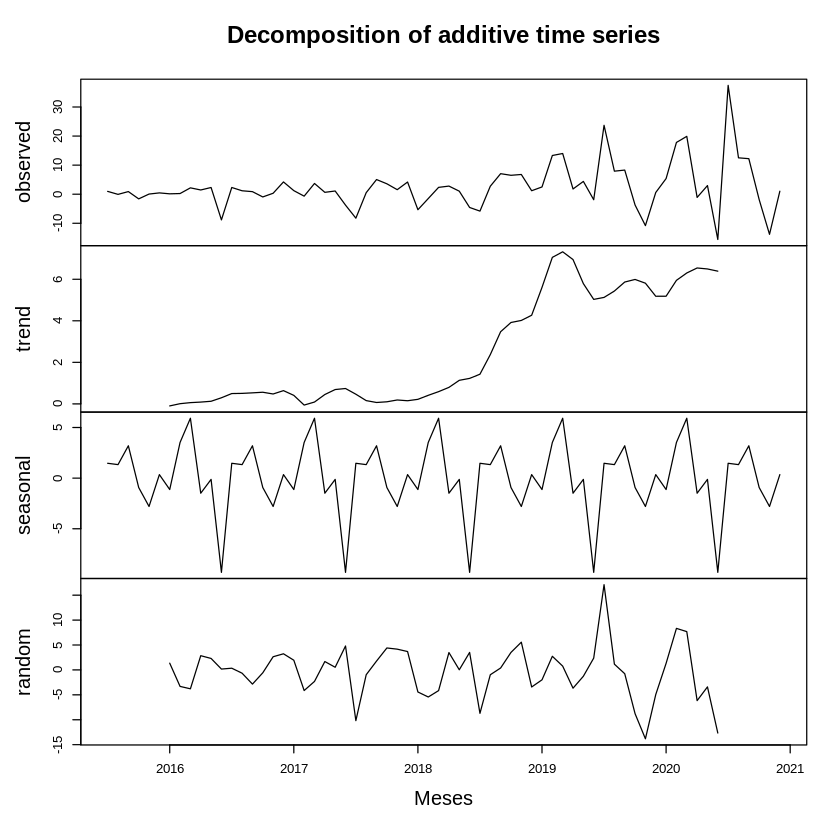

In [17]:
RdoOrdinario.ts.desc = decompose(RdoOrdinario.ts)
plot(RdoOrdinario.ts.desc, xlab='Meses')

In [18]:
fit=arima (RdoOrdinario.ts,order = c(1,1,1),seasonal = c(0,1,0))
summary(fit)


Call:
arima(x = RdoOrdinario.ts, order = c(1, 1, 1), seasonal = c(0, 1, 0))

Coefficients:
         ar1      ma1
      0.2185  -1.0000
s.e.  0.1352   0.0617

sigma^2 estimated as 44.31:  log likelihood = -177.45,  aic = 360.9

Training set error measures:
                    ME     RMSE      MAE     MPE     MAPE     MASE        ACF1
Training set 0.2692776 5.965269 3.304665 25.8882 84.71526 0.515732 -0.01044088

         Point Forecast      Lo 80     Hi 80       Lo 95     Hi 95
Jan 2021      6.6091486  -1.999679 15.217976  -6.5569167 19.775214
Feb 2021     19.2111095  10.366185 28.056034   5.6839644 32.738255
Mar 2021     21.3423112  12.479086 30.205537   7.7871777 34.897445
Apr 2021      0.3430995  -8.522568  9.208767 -13.2157689 13.901968
May 2021      4.4177665  -4.448360 13.283893  -9.1418045 17.977338
Jun 2021    -14.1237831 -22.990007 -5.257559 -27.6835022 -0.564064
Jul 2021     38.8921407  30.025896 47.758385  25.3323895 52.451892
Aug 2021     13.9645634   5.098314 22.830813   0.4048052 27.524322
Sep 2021     13.6723955   4.806145 22.538646   0.1126358 27.232155
Oct 2021     -0.4038696  -9.270120  8.462381 -13.9636297 13.155890
Nov 2021    -12.3504104 -21.216661 -3.484160 -25.9101705  1.209350
Dec 2021      2.4826496  -6.383601 11.348900 -11.0771105 16.042410

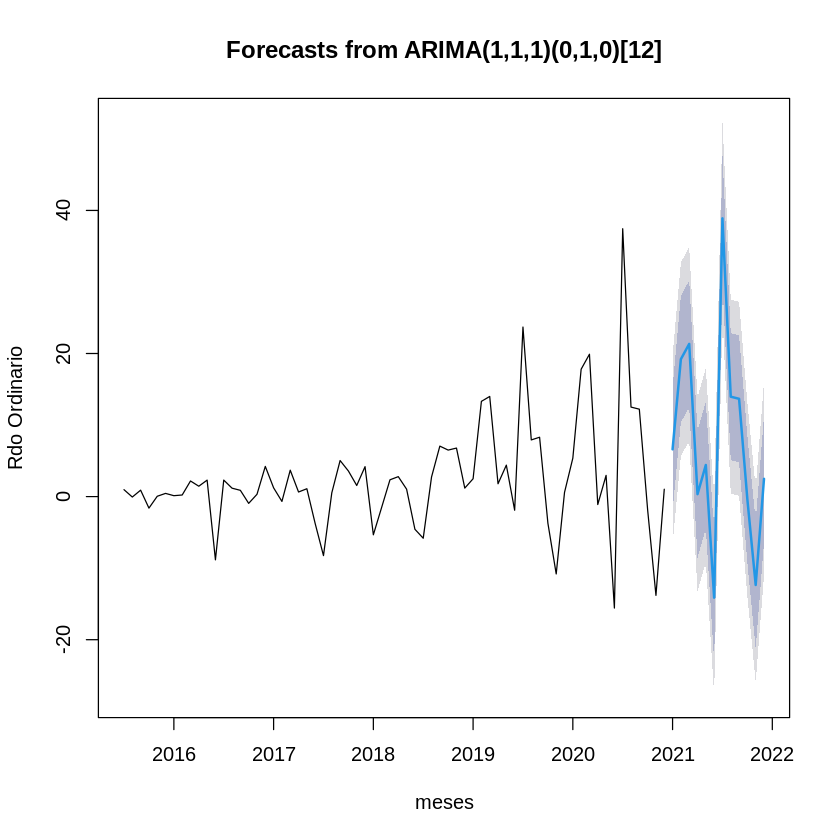

In [19]:
plot(forecast(fit, h=12),ylab="Rdo Ordinario", xlab="meses",type="l",lwd=1,pch=1,cex=1)
forecast(fit, h=12)

In [20]:
predic.log=forecast(fit, h=12)

(predic.log$mean)
(predic.log$lower)
(predic.log$upper)


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,6.6091486,19.2111095,21.3423112,0.3430995,4.4177665,-14.1237831,38.8921407,13.9645634,13.6723955,-0.4038696,-12.3504104,2.4826496


,80%,95%
Jan 2021,-1.999679,-6.5569167
Feb 2021,10.366185,5.6839644
Mar 2021,12.479086,7.7871777
Apr 2021,-8.522568,-13.2157689
May 2021,-4.448360,-9.1418045
Jun 2021,-22.990007,-27.6835022
Jul 2021,30.025896,25.3323895
Aug 2021,5.098314,0.4048052
Sep 2021,4.806145,0.1126358
Oct 2021,-9.270120,-13.9636297


,80%,95%
Jan 2021,15.217976,19.775214
Feb 2021,28.056034,32.738255
Mar 2021,30.205537,34.897445
Apr 2021,9.208767,13.901968
May 2021,13.283893,17.977338
Jun 2021,-5.257559,-0.564064
Jul 2021,47.758385,52.451892
Aug 2021,22.830813,27.524322
Sep 2021,22.538646,27.232155
Oct 2021,8.462381,13.155890


In [24]:
sum(predic.log$mean)*1000000

[1] 94057121